# Compute deltanu for the entire sample of stars

In [1]:
import os
import numpy as np
from astropy.io import fits
from astropy.table import Table, join, vstack

from matplotlib import pyplot as plt
import seaborn as sns

import estimatednu as ednu

In [2]:
# Set plotting style 
sns.set(style="ticks", palette="muted", 
        rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('matplotlibrc')

In [3]:
# Flags
floatfill = -99
runtimefill = -88

In [19]:
new = False

In [10]:
# Read in table
if new:
    summarytable = Table.read('corot_multi_spectro_allfields.csv',
                              format='csv')
else:
    summarytable = Table.read('corot_multi_spectro_allfields_dnu.csv',
                              format='csv')
    summarytable.remove_column('dnu_lk')
summarytable

star,backgroundrun,initialnumax,w,upper_credlimit_w,lower_credlimit_w,error_w,stdgran,upper_credlimit_stdgran,lower_credlimit_stdgran,error_stdgran,nugran,upper_credlimit_nugran,lower_credlimit_nugran,error_nugran,hosc,upper_credlimit_hosc,lower_credlimit_hosc,error_hosc,numax,upper_credlimit_numax,lower_credlimit_numax,error_numax,stdenv,upper_credlimit_stdenv,lower_credlimit_stdenv,error_stdenv,final_oc_std,corotrun,outside_numaxrange,high_oc_std,weak_detection,dnu_famed,error_dnu_famed,dnu_smth_famed,dnu_lk
str13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str3,str5,str5,str5,float64,float64,float64,float64
CRT0100402467,1,47.62961135377252,3237.321272,3286.612775,3165.978308,60.46238374398758,1126.699135,1171.582854,1092.620756,39.51513471519145,12.37864497,13.02123379,11.95407735,0.5336466690457364,1835.328876,3121.709977,916.4852329,1113.7226444237465,50.15828943,50.84073888,48.21330849,1.314060930597601,1.347474042,3.60194008,0.8501653574,1.3994863035728,5476.514816198218,C01,False,False,True,2.6198904779011554,0.9173855604541304,3.421925756238489,4.244928599867445
CRT0100405256,--,37.75823569117863,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0100406897,2,119.9987918705296,6022.326267,6153.663082,5912.432198,120.77657064158645,1447.680664,1541.155056,1406.785617,67.51026251087833,6.975267733,7.43521594,6.378578167,0.5290190412377699,4501.076843,4487.662429,4487.662429,1959.6454359999996,123.192024,124.7580675,121.7106315,1.5279960152330485,2.095844481,3.992194764,0.831610958,1.5928217639714919,1472.1518895008667,C01,True,False,True,5.713329406248748,2.2346572926407844,6.925325935244561,13.944488428388507
CRT0100407529,--,24.71611178612763,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0100408489,0,117.11078892432492,3620.034187,3705.804668,3551.417802,77.28713206432383,1071.111011,1086.194523,1039.148331,23.56236955837369,56.29895445,56.54855304,56.29895445,0.1599750992967202,698.2812925,1255.623736,640.8233086,314.24989121842634,111.7107206,115.3918773,106.7779707,4.416249642658281,9.413786109,11.93042258,9.413786109,1.263179086655157,2909.7241181661143,C01,True,False,True,-88.0,-88.0,6.4364793986390625,7.91069929903729
CRT0100411312,--,10.287044784575738,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRT0738644774,--,37.8775852999666,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,A07,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0738645059,0,110.31967374428172,17098.25619,17850.87476,16181.42994,835.2860222694829,4215.446371,4218.002564,4209.968815,4.110017973225119,53.08876152,53.23582898,53.08876152,0.12533983623291214,3886.884082,6436.335529,3886.884082,1280.2039030487554,122.8287966,122.721418,122.721418,13.334000799999998,9.084324974,13.12327074,9.084324974,2.0213198363274896,60019.820359393416,A07,True,True,True,3.4958661041060552,2.5084581589232258,6.325323287678554,14.299427527121892


In [6]:
# Compute dnu_lk for all stars
# Due to memory issues on a typical laptop, this cell needs to
# be rerun enough time for all chunks to have been saved
chunksize = 5000
chunks = int(np.ceil(len(summarytable['star']) / chunksize))
for j in range(chunks):
    stfile = 'st_chunk' + str(j) + '.csv'
    if os.path.isfile(stfile):
        continue
    print(j)
    chunkmask = np.zeros(len(summarytable['star']), dtype=bool)
    chunkmask[(j*chunksize):(j*chunksize)+chunksize] = True
    st = summarytable[chunkmask]
    dnu_lks = []
    for i, row in enumerate(st):
        if i % 2000 == 0:
            print('i', i)
        star_id = row['star']
        bgrun = '0' + str(row['backgroundrun'])
        numax = row['initialnumax']
        freq, psd = ednu.extract_parameters(star_id, bgrun, returnpsd=True)
        dnu_lk = ednu.deltanu_lightkurve(freq, psd, numax, silent=True)
        dnu_lks.append(dnu_lk)
    st.add_column(dnu_lks, name='dnu_lk')
    st.write(stfile, overwrite=True)

4
i 0
i 2000
i 4000
5
i 0
i 2000


In [8]:
for j in range(chunks):
    stfile = 'st_chunk' + str(j) + '.csv'
    if j == 0:
        st = Table.read(stfile)
    else:
        tmp = Table.read(stfile)
        st = vstack([st, tmp])

In [13]:
summarytable.add_column(st['dnu_lk'], name='dnu_lk')

In [14]:
summarytable

star,backgroundrun,initialnumax,w,upper_credlimit_w,lower_credlimit_w,error_w,stdgran,upper_credlimit_stdgran,lower_credlimit_stdgran,error_stdgran,nugran,upper_credlimit_nugran,lower_credlimit_nugran,error_nugran,hosc,upper_credlimit_hosc,lower_credlimit_hosc,error_hosc,numax,upper_credlimit_numax,lower_credlimit_numax,error_numax,stdenv,upper_credlimit_stdenv,lower_credlimit_stdenv,error_stdenv,final_oc_std,corotrun,outside_numaxrange,high_oc_std,weak_detection,dnu_famed,error_dnu_famed,dnu_smth_famed,dnu_lk
str13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str3,str5,str5,str5,float64,float64,float64,float64
CRT0100402467,1,47.62961135377252,3237.321272,3286.612775,3165.978308,60.46238374398758,1126.699135,1171.582854,1092.620756,39.51513471519145,12.37864497,13.02123379,11.95407735,0.5336466690457364,1835.328876,3121.709977,916.4852329,1113.7226444237465,50.15828943,50.84073888,48.21330849,1.314060930597601,1.347474042,3.60194008,0.8501653574,1.3994863035728,5476.514816198218,C01,False,False,True,2.6198904779011554,0.9173855604541304,3.421925756238489,6.123077784680434
CRT0100405256,--,37.75823569117863,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,4.736903307316337
CRT0100406897,2,119.9987918705296,6022.326267,6153.663082,5912.432198,120.77657064158645,1447.680664,1541.155056,1406.785617,67.51026251087833,6.975267733,7.43521594,6.378578167,0.5290190412377699,4501.076843,4487.662429,4487.662429,1959.6454359999996,123.192024,124.7580675,121.7106315,1.5279960152330485,2.095844481,3.992194764,0.831610958,1.5928217639714919,1472.1518895008667,C01,True,False,True,5.713329406248748,2.2346572926407844,6.925325935244561,6.93160456256585
CRT0100407529,--,24.71611178612763,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,3.597109668673972
CRT0100408489,0,117.11078892432492,3620.034187,3705.804668,3551.417802,77.28713206432383,1071.111011,1086.194523,1039.148331,23.56236955837369,56.29895445,56.54855304,56.29895445,0.1599750992967202,698.2812925,1255.623736,640.8233086,314.24989121842634,111.7107206,115.3918773,106.7779707,4.416249642658281,9.413786109,11.93042258,9.413786109,1.263179086655157,2909.7241181661143,C01,True,False,True,-88.0,-88.0,6.4364793986390625,12.477139590468648
CRT0100411312,--,10.287044784575738,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,1.8047989374447004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRT0738644774,--,37.8775852999666,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,A07,--,--,--,-99.0,-99.0,-99.0,6.799722709563374
CRT0738645059,0,110.31967374428172,17098.25619,17850.87476,16181.42994,835.2860222694829,4215.446371,4218.002564,4209.968815,4.110017973225119,53.08876152,53.23582898,53.08876152,0.12533983623291214,3886.884082,6436.335529,3886.884082,1280.2039030487554,122.8287966,122.721418,122.721418,13.334000799999998,9.084324974,13.12327074,9.084324974,2.0213198363274896,60019.820359393416,A07,True,True,True,3.4958661041060552,2.5084581589232258,6.325323287678554,14.299427527121892


In [5]:
# Compute dnu for successfull Background runs
dnu_fameds = []
error_dnu_fameds = []
dnu_smth_fameds = []
for i, row in enumerate(summarytable):
    if i % 2000 == 0:
        print('i', i)
    star_id = row['star']
    bgrun = '0' + str(row['backgroundrun'])
    e = ednu.extract_parameters(star_id, bgrun)
    if len(e) == 0:
        dnu_famed = error_dnu_famed = dnu_smth_famed = dnu_lk = floatfill
    else:
        dnu_famed, error_dnu_famed, dnu_smth_famed = ednu.deltanu_famed(*e)
    dnu_fameds.append(dnu_famed)
    error_dnu_fameds.append(error_dnu_famed)
    dnu_smth_fameds.append(dnu_smth_famed)

0


/home/amalie/.local/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000


In [7]:
summarytable.add_column(dnu_fameds, name='dnu_famed')
summarytable.add_column(error_dnu_fameds, name='error_dnu_famed')
summarytable.add_column(dnu_smth_fameds, name='dnu_smth_famed')

In [15]:
summarytable

star,backgroundrun,initialnumax,w,upper_credlimit_w,lower_credlimit_w,error_w,stdgran,upper_credlimit_stdgran,lower_credlimit_stdgran,error_stdgran,nugran,upper_credlimit_nugran,lower_credlimit_nugran,error_nugran,hosc,upper_credlimit_hosc,lower_credlimit_hosc,error_hosc,numax,upper_credlimit_numax,lower_credlimit_numax,error_numax,stdenv,upper_credlimit_stdenv,lower_credlimit_stdenv,error_stdenv,final_oc_std,corotrun,outside_numaxrange,high_oc_std,weak_detection,dnu_famed,error_dnu_famed,dnu_smth_famed,dnu_lk
str13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str3,str5,str5,str5,float64,float64,float64,float64
CRT0100402467,1,47.62961135377252,3237.321272,3286.612775,3165.978308,60.46238374398758,1126.699135,1171.582854,1092.620756,39.51513471519145,12.37864497,13.02123379,11.95407735,0.5336466690457364,1835.328876,3121.709977,916.4852329,1113.7226444237465,50.15828943,50.84073888,48.21330849,1.314060930597601,1.347474042,3.60194008,0.8501653574,1.3994863035728,5476.514816198218,C01,False,False,True,2.6198904779011554,0.9173855604541304,3.421925756238489,4.244928599867445
CRT0100405256,--,37.75823569117863,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0100406897,2,119.9987918705296,6022.326267,6153.663082,5912.432198,120.77657064158645,1447.680664,1541.155056,1406.785617,67.51026251087833,6.975267733,7.43521594,6.378578167,0.5290190412377699,4501.076843,4487.662429,4487.662429,1959.6454359999996,123.192024,124.7580675,121.7106315,1.5279960152330485,2.095844481,3.992194764,0.831610958,1.5928217639714919,1472.1518895008667,C01,True,False,True,5.713329406248748,2.2346572926407844,6.925325935244561,13.944488428388507
CRT0100407529,--,24.71611178612763,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0100408489,0,117.11078892432492,3620.034187,3705.804668,3551.417802,77.28713206432383,1071.111011,1086.194523,1039.148331,23.56236955837369,56.29895445,56.54855304,56.29895445,0.1599750992967202,698.2812925,1255.623736,640.8233086,314.24989121842634,111.7107206,115.3918773,106.7779707,4.416249642658281,9.413786109,11.93042258,9.413786109,1.263179086655157,2909.7241181661143,C01,True,False,True,-88.0,-88.0,6.4364793986390625,7.91069929903729
CRT0100411312,--,10.287044784575738,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,C01,--,--,--,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRT0738644774,--,37.8775852999666,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,A07,--,--,--,-99.0,-99.0,-99.0,-99.0
CRT0738645059,0,110.31967374428172,17098.25619,17850.87476,16181.42994,835.2860222694829,4215.446371,4218.002564,4209.968815,4.110017973225119,53.08876152,53.23582898,53.08876152,0.12533983623291214,3886.884082,6436.335529,3886.884082,1280.2039030487554,122.8287966,122.721418,122.721418,13.334000799999998,9.084324974,13.12327074,9.084324974,2.0213198363274896,60019.820359393416,A07,True,True,True,3.4958661041060552,2.5084581589232258,6.325323287678554,14.299427527121892


In [15]:
# Save table
summarytable.write('corot_multi_spectro_allfields_dnu.csv', overwrite=True)

In [16]:
# Compare dnu for stars with multiple runs
v,c = np.unique(summarytable['star'], return_counts=True)
multistars = v[c > 1]

summarytable[np.isin(summarytable['star'], multistars)].write('multistars_dnu.csv', overwrite=True)

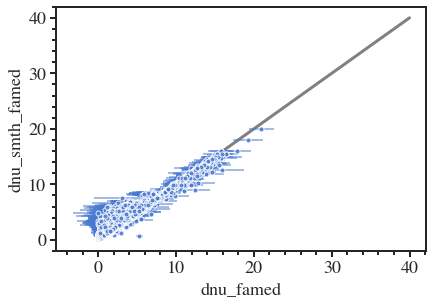

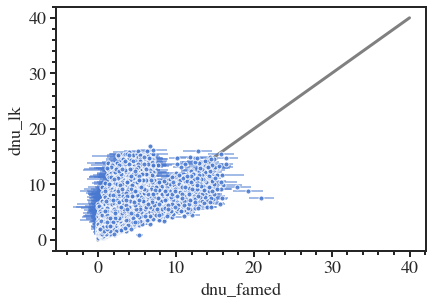

In [17]:
# Compare dnu for overlap
for comparednu in ['dnu_smth_famed', 'dnu_lk']:
    mini = - 0.05
    maxi = 40
    fo = ((summarytable['dnu_famed'] != floatfill) &
          (summarytable['dnu_famed'] != runtimefill) &
          (summarytable[comparednu] != floatfill) &
          (summarytable['dnu_famed'] < maxi) &
          (summarytable['dnu_famed'] > mini))
    plt.plot([mini, maxi], [mini, maxi], color='0.5', lw=3)
    plt.errorbar(summarytable['dnu_famed'][fo],
                 summarytable[comparednu][fo],
                 xerr=summarytable['error_dnu_famed'][fo],
                 ls='none', alpha=0.5)
    plt.plot(summarytable['dnu_famed'][fo],
                 summarytable[comparednu][fo], '.',
                 mfc='b',
                 mec='white', alpha=0.85,
                 ms=10, mew=1)
    plt.xlabel('dnu_famed')
    plt.ylabel(comparednu)
    plt.show()

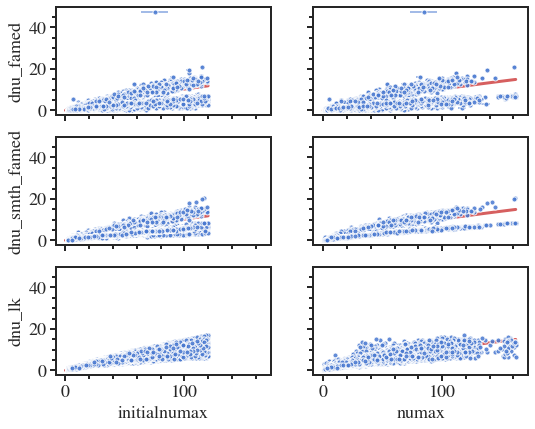

In [18]:
# Numax vs dnu from scaling relations
numaxcols = ['initialnumax', 'numax']
dnucols = ['dnu_famed', 'dnu_smth_famed', 'dnu_lk']
f, axs = plt.subplots(
                      len(dnucols), len(numaxcols),
    figsize=[8.47, 8.47 * 4/5],
                      sharex=True, sharey=True)
for i, dnucol in enumerate(dnucols):
    for j, numaxcol in enumerate(numaxcols):
        mini = 0
        maxi = np.amax(summarytable[numaxcol])
        fo = ((summarytable[dnucol] != floatfill) &
              (summarytable[dnucol] != runtimefill) &
              (summarytable[numaxcol] != floatfill) & 
              (summarytable[dnucol] > 0) & 
              (summarytable[dnucol] < 100) &
              (summarytable[numaxcol] > mini) &
              (summarytable[numaxcol] < maxi))
        xs = np.linspace(mini, maxi)
        ys = 0.294 * xs ** 0.772  # Stello+2009
        axs[i, j].plot(xs, ys, lw=3, c='r')
        if dnucol == 'dnu_famed':
            axs[i, j].errorbar(
                summarytable[numaxcol][fo],
                summarytable[dnucol][fo],
                xerr=summarytable['error_' + dnucol][fo],
                ls='none', alpha=0.5, c='b')
        axs[i, j].plot(summarytable[numaxcol][fo],
                     summarytable[dnucol][fo], '.',
                     mfc='b',
                     mec='white', alpha=0.85,
                     ms=10, mew=1)
        if i == len(numaxcols):
            axs[i, j].set_xlabel(numaxcol)
        if j == 0:
            axs[i, j].set_ylabel(dnucol)
plt.show()